# Thompson sampling on the Bernoulli problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.stats import beta

In [2]:
T = 500000  # number of iterations
N = 5     # number of bandits

#mu = np.array([rnd.random() for _ in range(N)]) # initialize randomly the mu_i (true probs)
mu = np.array([0.71, 0.69, 0.26, 0.08, 0.57]) # initialize the mu_i (true hidden probs)
bandits = np.array([[1, 1] for _ in range(N)]) # the state of each bandit [nb_success+1, nb_fail+1]

history = np.zeros((T+1, N, 2))
history[0] = bandits[:]
action_history = np.zeros(T)

reward_in_time = np.zeros(T)

for t in range(T):
    theta = np.array([rnd.beta(bdt[0], bdt[1]) for bdt in bandits])   # sample de theta_k
    
    action = np.argmax(theta) # select action
    action_history[t] = action
    rwd = rnd.binomial(1, mu[action]) # determine reward
    
    # update
    bandits[action, 0] += rwd
    bandits[action, 1] += 1 - rwd
    reward_in_time[t] = rwd
    
    history[t+1] = bandits[:] 

In [3]:
%matplotlib inline

def plot_distributions(history, t, N = N, name=None):
    fig = plt.figure(figsize=(18,9))

    X = np.linspace(0, 1, 1000)
    fig.suptitle("T = " + str(t))
    
    for k in range(N):
        plt.subplot(N, 1, k+1)
        label = "".join(["p_", str(k+1),  "=", str(round(mu[k], 2)),  "\n" , str(int(history[t, k, 0]-1)), "/", str(int(history[t, k, 0] + history[t, k, 1]-2))])
        plt.plot(X, beta.pdf(X, history[t, k, 0], history[t, k, 1]), "b", label=label)
        plt.legend()
        
    if name:
        plt.savefig(name)
        
        plt.close()
        
plot_distributions(history, 1000, name="fig1000")

<Figure size 1296x648 with 0 Axes>

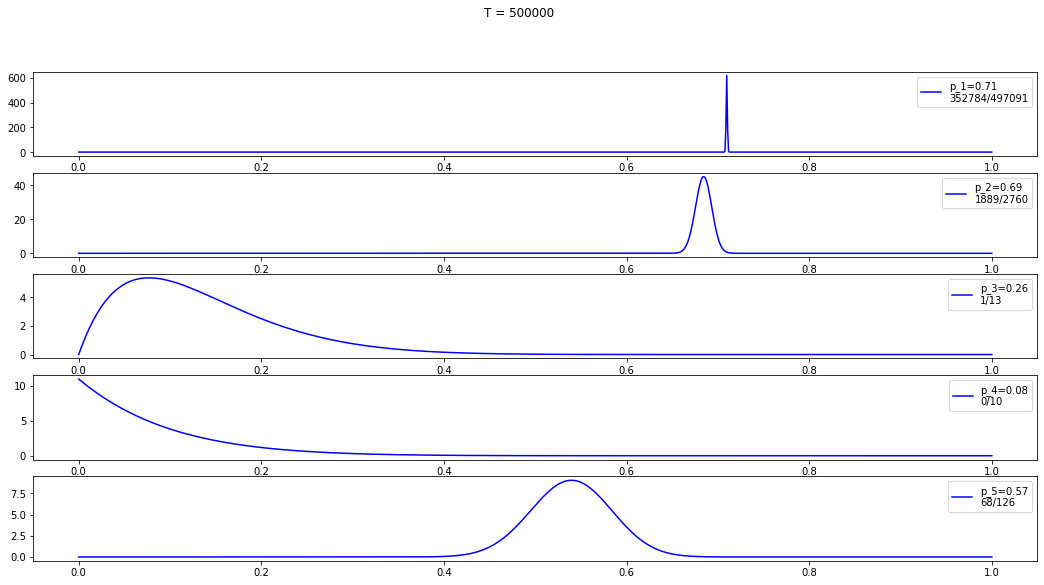

In [41]:
fig = plt.figure(figsize=(18,9))

plot_distributions(history, T)

In [6]:
"""for t in range(0, 10, 1):
    plot_distributions(history, t, name='fig/thompson'+str(t))"""

"for t in range(0, 10, 1):\n    plot_distributions(history, t, name='fig/thompson'+str(t))"

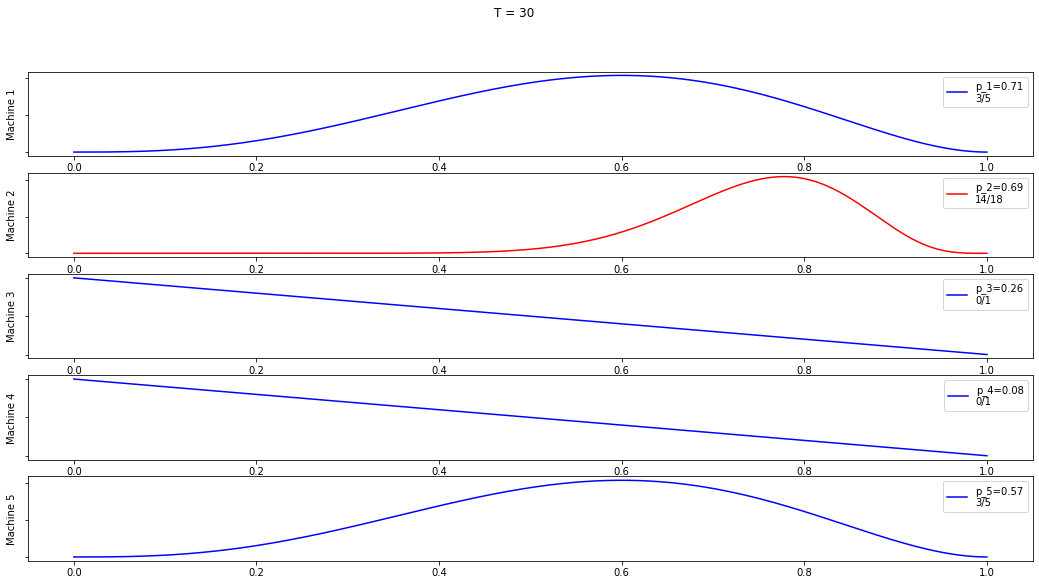

In [5]:
import matplotlib.animation as animation


X = np.linspace(0, 1, 1000)

fig = plt.figure(figsize=(18,9))
axs = [fig.add_subplot(N, 1, k+1) for k in range(N)]
count = -2


def animate(i): 
    global count
    fig.suptitle("T = " + str(max(count+1, 0)))
    for k, ax in enumerate(axs):
        ax.cla()
        ax.yaxis.set_ticklabels([])
        ax.set_ylabel("Machine " + str(k+1))
        if count >= 0:
            col = "r" if action_history[count] == k else "b"
        else: col = "b"

        label = "".join(["p_", str(k+1),  "=", str(round(mu[k], 2)),  "\n" , str(int(history[count+1, k, 0]-1)), "/", str(int(history[count+1, k, 0] + history[count+1, k, 1]-2))])
        ax.plot(X, beta.pdf(X, history[count+1, k, 0], history[count+1, k, 1]), col, label=label)
        ax.legend(loc="upper right")
    count += 1


ani = animation.FuncAnimation(fig, animate, frames=30)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)

ani.save('lines_1.mp4', writer=writer)

In [6]:
ani = animation.FuncAnimation(fig, animate, frames=200)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)

ani.save('lines_2.mp4', writer=writer)

In [7]:
ani = animation.FuncAnimation(fig, animate, frames=1000)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)

ani.save('lines_3.mp4', writer=writer)

In [8]:
ani = animation.FuncAnimation(fig, animate, frames=10000)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=1000, metadata=dict(artist='Me'), bitrate=1800)

ani.save('lines_4.mp4', writer=writer)

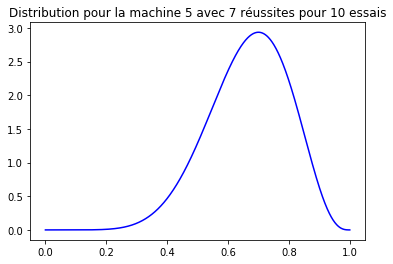

In [23]:
plt.title("Distribution pour la machine 5 avec 7 réussites pour 10 essais")
plt.plot(X, beta.pdf(X, 8, 4), "b")
plt.savefig("machine5")